In [1]:
import numpy as np
import mass_balance as mb
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data taken from Extended Data Table 1
a_Mg_OS, b_Mg_OS, c_Mg_OS = 0.1,-10851,0.0  # OS16
a_Si_OS, b_Si_OS, c_Si_OS = 1.3,-13500,0.0  # Originally from Fischer et ao 2015
a_O_OS , b_O_OS , c_O_OS  = 0.6,-3800 ,22.0 # Originally from Fischer et ao 2015

Tcmb = np.linspace(6000,2000,1001)
dT = Tcmb[0]-Tcmb[1]

verbose = 1
var = 1

Initial core mole fractions of Fe  =   0.74 O   =   0.18 Mg   =   0.05 Si  =   0.04 All =   1.00
Initial mant mole fractions of FeO =   0.28 MgO =   0.62 SiO2 =   0.10 all =   1.00
Initial core mass fractions of O   =   6.12 Mg  =   1.93 Si  =   2.82
Initial mant mass fractions of FeO =  32.30 MgO =   6.53 SiO2 =  61.17
Core mole fractions of Fe  =   0.82 O   =   0.18 Mg   =   0.00 Si  =   0.00 All =   1.00
Mant mole fractions of FeO =   0.09 MgO =   0.73 SiO2 =   0.18 all =   1.00
Core mass fractions of O   =   5.74 Mg  =   0.00 Si  =   0.00
Mant mass fractions of FeO =  11.81 MgO =  12.19 SiO2 =  76.00


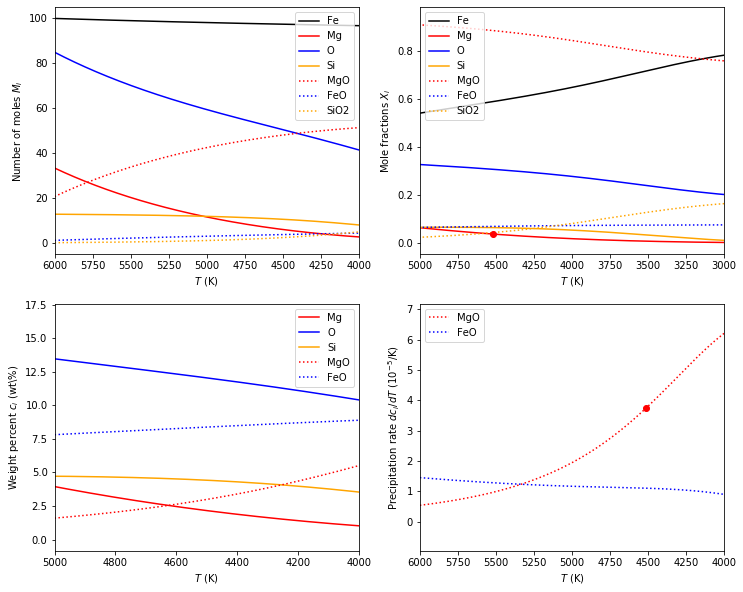

In [3]:
# Default case with a, b, c defined as above. 
Kd_Mg      = 10**mb.logKd(a_Mg_OS, b_Mg_OS, c_Mg_OS, Tcmb)
Kd_O       = 10**mb.logKd(a_O_OS , b_O_OS , c_O_OS , Tcmb) 
Kd_Si      = 10**mb.logKd(a_Si_OS, b_Si_OS, c_Si_OS, Tcmb) 

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # Default composition
iMFeO, iMMgO, iMSiO2  = 22, 50, 8
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol1 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var)

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # High SiO2
iMFeO, iMMgO, iMSiO2  = 28, 40, 30
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol2 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var)

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # High FeO
iMFeO, iMMgO, iMSiO2  = 48, 40, 20
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol3 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var)

if verbose == 1:
    mb.print_init_conc(sol1[0],sol1[2])
    mb.print_any_conc(sol1[1],sol1[3],-1)
    mb.plot_all(Tcmb, sol1[5], sol1[1], sol1[3], sol1[4])

In [4]:
# Decrease a, b, c by 0.25 * sigma 
verbose = 1

fac = 0.25
a_O_OS_25s , b_O_OS_25s , c_O_OS_25s  = (a_O_OS-fac*0.4), (b_O_OS+fac*900) , (c_O_OS-fac*14) 

Kd_Mg      = 10**mb.logKd(a_Mg_OS   , b_Mg_OS, c_Mg_OS , Tcmb)   
Kd_O       = 10**mb.logKd(a_O_OS_25s, b_O_OS_25s , c_O_OS_25s , Tcmb) 
Kd_Si      = 10**mb.logKd(a_Si_OS   , b_Si_OS, c_Si_OS, Tcmb) 

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # Default composition
iMFeO, iMMgO, iMSiO2  = 22, 50, 8
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol4 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var)

In [5]:
fac = 0.75
a_O_OS_15s , b_O_OS_15s , c_O_OS_15s  = (a_O_OS-fac*0.4), (b_O_OS-fac*900) , (c_O_OS-fac*14) 

Kd_Mg      = 10**mb.logKd(a_Mg_OS   , b_Mg_OS, c_Mg_OS , Tcmb)   
Kd_O       = 10**mb.logKd(a_O_OS_15s, b_O_OS_15s , c_O_OS_15s , Tcmb) 
Kd_Si      = 10**mb.logKd(a_Si_OS   , b_Si_OS, c_Si_OS, Tcmb) 

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # Default composition
iMFeO, iMMgO, iMSiO2  = 28, 50, 5
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol5 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var)

In [6]:
# Du et al Table S3
a_Si_Du, b_Si_Du, c_Si_Du = 0.6,-11700,0.0 # Fischer
a_O_Du , b_O_Du , c_O_Du  = 0.1,-2200 ,5.0 # Fischer 2015

Kd_Mg      = 10**mb.logKd(a_Mg_OS, b_Mg_OS, c_Mg_OS, Tcmb) 
Kd_O       = 10**mb.logKd(a_O_Du , b_O_Du , c_O_Du , Tcmb) 
Kd_Si      = 10**mb.logKd(a_Si_Du, b_Si_Du, c_Si_Du, Tcmb) 

iMFe, iMO, iMSi, iMMg = 79, 19, 5, 4 # Default composition
iMFeO, iMMgO, iMSiO2  = 28, 50, 5
iM = [iMFe, iMO, iMSi, iMMg, iMFeO, iMMgO, iMSiO2]
sol5 = mb.run_massbalance(iM, [Kd_Mg, Kd_O, Kd_Si], Tcmb, var)

Compare solutions

In [7]:
mb.print_init_conc(sol1[0],sol1[2])
print("")
mb.print_init_conc(sol2[0],sol2[2])
print("")
mb.print_init_conc(sol3[0],sol3[2])

print("---")

mb.print_any_conc(sol1[1],sol1[3],-1)
print("")
mb.print_any_conc(sol2[1],sol2[3],-1)
print("")
mb.print_any_conc(sol3[1],sol3[3],-1)

Initial core mole fractions of Fe  =   0.74 O   =   0.18 Mg   =   0.05 Si  =   0.04 All =   1.00
Initial mant mole fractions of FeO =   0.28 MgO =   0.62 SiO2 =   0.10 all =   1.00
Initial core mass fractions of O   =   6.12 Mg  =   1.93 Si  =   2.82
Initial mant mass fractions of FeO =  32.30 MgO =   6.53 SiO2 =  61.17

Initial core mole fractions of Fe  =   0.74 O   =   0.18 Mg   =   0.05 Si  =   0.04 All =   1.00
Initial mant mole fractions of FeO =   0.29 MgO =   0.41 SiO2 =   0.31 all =   1.00
Initial core mass fractions of O   =   6.12 Mg  =   1.93 Si  =   2.82
Initial mant mass fractions of FeO =  35.90 MgO =  21.37 SiO2 =  42.74

Initial core mole fractions of Fe  =   0.74 O   =   0.18 Mg   =   0.05 Si  =   0.04 All =   1.00
Initial mant mole fractions of FeO =   0.44 MgO =   0.37 SiO2 =   0.19 all =   1.00
Initial core mass fractions of O   =   6.12 Mg  =   1.93 Si  =   2.82
Initial mant mass fractions of FeO =  51.92 MgO =  12.02 SiO2 =  36.06
---
Core mole fractions of Fe  =

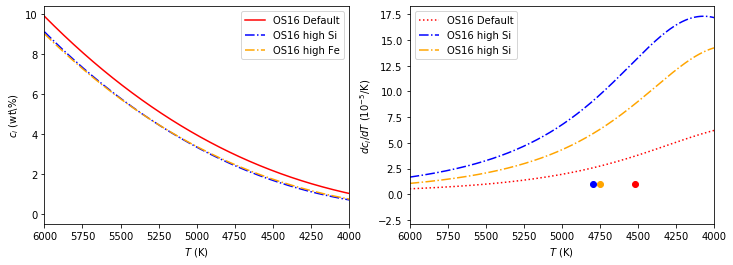

In [8]:
fig, ((ax3, ax5)) = plt.subplots(1, 2, figsize=(12,4))

# wt% Mg (element 3)
ax3.set_xlim([6000,4000])
#ax3.set_ylim([0,4])       # To compare to the Du plot. 
ax3.set_xlabel("$T$ (K)")
ax3.set_ylabel("$c_{i}$ (wt\%)")
ax3.plot(Tcmb, sol1[3][3]*100, color='red'   , label="OS16 Default")
ax3.plot(Tcmb, sol2[3][3]*100, color='blue'  , label="OS16 high Si",linestyle='-.')
ax3.plot(Tcmb, sol3[3][3]*100, color='orange', label="OS16 high Fe",linestyle='-.')
ax3.legend()

# change in MgO conc (element 5)
ax5.set_xlim([6000,4000])
ax5.set_xlabel("$T$ (K)")
ax5.set_ylabel("$dc_{i}/dT$ ($10^{-5}$/K)")
ax5.plot(Tcmb, np.gradient(sol1[3][5], dT)*1e5 , color='red'   , label="OS16 Default" , linestyle=':')
ax5.plot(Tcmb, np.gradient(sol2[3][5], dT)*1e5 , color='blue'   , label="OS16 high Si",linestyle='-.')
ax5.plot(Tcmb, np.gradient(sol3[3][5], dT)*1e5 , color='orange'   , label="OS16 high Si",linestyle='-.')
ax5.plot(Tcmb[sol1[4]], 1.0   , color='red'   , marker='o')
ax5.plot(Tcmb[sol2[4]], 1.0   , color='blue'  , marker='o')
ax5.plot(Tcmb[sol3[4]], 1.0   , color='orange', marker='o')
ax5.legend(loc=2)